In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
transactions = pd.read_csv('/content/Transactions.csv')
products = pd.read_csv('/content/Products.csv')
customers = pd.read_csv('/content/Customers.csv')

In [4]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [5]:
print("\nDataset Shapes:")
print(f"Transactions: {transactions.shape}")
print(f"Products: {products.shape}")
print(f"Customers: {customers.shape}")


Dataset Shapes:
Transactions: (1000, 7)
Products: (100, 4)
Customers: (200, 4)


In [6]:
total_revenue = transactions['TotalValue'].sum()
avg_order_value = transactions['TotalValue'].mean()
total_transactions = len(transactions)

In [7]:
print("\nTransaction Insights:")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${avg_order_value:,.2f}")
print(f"Total Transactions: {total_transactions:,}")


Transaction Insights:
Total Revenue: $689,995.56
Average Order Value: $690.00
Total Transactions: 1,000


In [8]:
product_analysis = transactions.merge(products, on='ProductID')

In [9]:
# Category performance
category_performance = product_analysis.groupby('Category').agg({
    'TotalValue': ['sum', 'mean'],
    'Quantity': 'sum',
    'TransactionID': 'count'
}).round(2)

print("\nCategory Performance:")
print(category_performance)


Category Performance:
            TotalValue         Quantity TransactionID
                   sum    mean      sum         count
Category                                             
Books        192147.47  711.66      681           270
Clothing     166170.66  728.82      590           228
Electronics  180783.50  711.75      627           254
Home Decor   150893.93  608.44      639           248


In [10]:
price_analysis = products.groupby('Category')['Price'].agg(['min', 'max', 'mean']).round(2)
print("\nPrice Analysis by Category:")
print(price_analysis)


Price Analysis by Category:
               min     max    mean
Category                          
Books        33.59  497.76  292.21
Clothing     18.82  481.78  263.72
Electronics  16.08  459.86  275.35
Home Decor   41.18  454.53  235.02


In [11]:
customer_analysis = transactions.merge(customers, on='CustomerID')

In [13]:
# Regional performance
regional_performance = customer_analysis.groupby('Region').agg({
    'TotalValue': ['sum', 'mean'],
    'CustomerID': 'nunique',
    'TransactionID': 'count'
}).round(2)

print("\nRegional Performance:")
print(regional_performance)


Regional Performance:
              TotalValue         CustomerID TransactionID
                     sum    mean    nunique         count
Region                                                   
Asia           152074.97  697.59         44           218
Europe         166254.63  710.49         50           234
North America  152313.40  624.24         46           244
South America  219352.56  721.55         59           304


In [14]:
# Monthly sales trend
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].agg(['sum', 'count'])
print("\nMonthly Sales Trend:")
print(monthly_sales)


Monthly Sales Trend:
                      sum  count
TransactionDate                 
2023-12           3769.52      4
2024-01          66376.39    107
2024-02          51459.27     77
2024-03          47828.73     80
2024-04          57519.06     86
2024-05          64527.74     86
2024-06          48771.18     69
2024-07          71366.39     96
2024-08          63436.74     94
2024-09          70603.75     96
2024-10          47063.22     70
2024-11          38224.37     57
2024-12          59049.20     78


In [15]:
# Customer signup trend
monthly_signups = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()
print("\nMonthly Customer Signups:")
print(monthly_signups)


Monthly Customer Signups:
SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, dtype: int64


(array([648]), [Text(648, 0, 'Jan\n2024')])

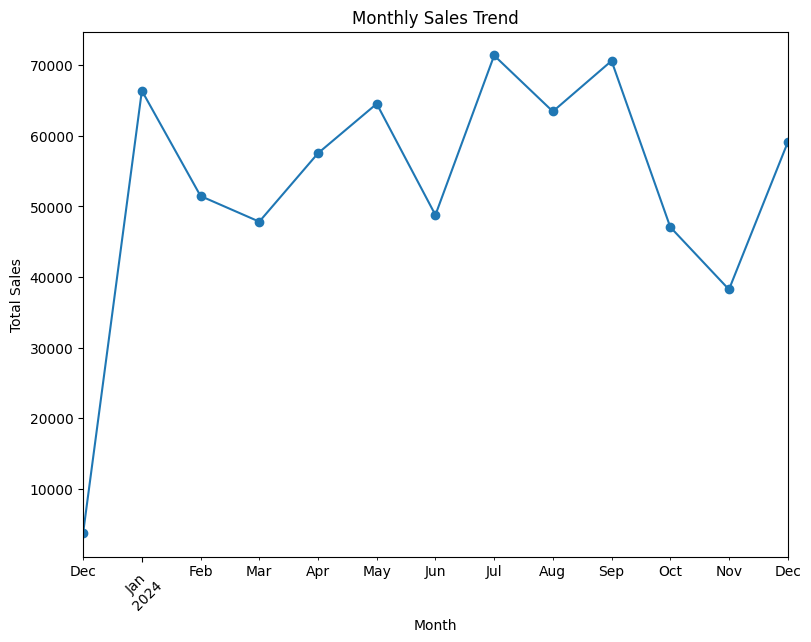

In [16]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
monthly_sales['sum'].plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Sales Distribution by Category')

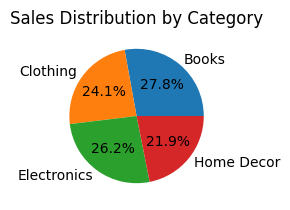

In [17]:
plt.subplot(2, 2, 2)
category_sales = product_analysis.groupby('Category')['TotalValue'].sum()
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Category')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'South America')])

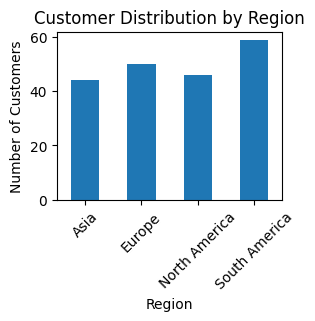

In [18]:
plt.subplot(2, 2, 3)
customer_analysis.groupby('Region')['CustomerID'].nunique().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Home Decor'),
  Text(3, 0, 'Clothing')])

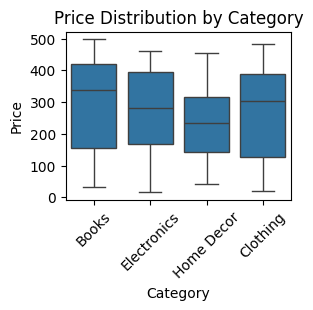

In [19]:
plt.subplot(2, 2, 4)
sns.boxplot(x='Category', y='Price', data=products)
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)

In [20]:
plt.tight_layout()
plt.savefig('eda_visualizations.png')
plt.close()

KEY BUSINESS INSIGHTS

In [21]:
# Insight 1: Category Performance
top_category = category_performance.loc[:, ('TotalValue', 'sum')].idxmax()
print("\n1. Category Analysis:")
print(f"- Top performing category is {top_category}")
print(f"- Average price range across categories: ${price_analysis['min'].min():.2f} to ${price_analysis['max'].max():.2f}")

# Insight 2: Regional Performance
top_region = regional_performance.loc[:, ('TotalValue', 'sum')].idxmax()
print("\n2. Regional Analysis:")
print(f"- {top_region} is the strongest region by sales")
print(f"- Average transaction value varies from ${regional_performance.loc[:, ('TotalValue', 'mean')].min():.2f} to ${regional_performance.loc[:, ('TotalValue', 'mean')].max():.2f} across regions")

# Insight 3: Customer Behavior
avg_customer_transactions = total_transactions / len(customers)
print("\n3. Customer Behavior:")
print(f"- Average transactions per customer: {avg_customer_transactions:.2f}")
print(f"- Customer base grew by {len(monthly_signups)} months")

# Insight 4: Transaction Patterns
print("\n4. Transaction Patterns:")
print(f"- Average order value: ${avg_order_value:.2f}")
print(f"- Total revenue: ${total_revenue:,.2f}")

# Insight 5: Product Strategy
top_product = product_analysis.groupby('ProductID')['TotalValue'].sum().idxmax()
top_product_name = products[products['ProductID'] == top_product]['ProductName'].iloc[0]
print("\n5. Product Strategy:")
print(f"- Best-selling product by value: {top_product_name}")
print(f"- Number of products: {len(products)}")


1. Category Analysis:
- Top performing category is Books
- Average price range across categories: $16.08 to $497.76

2. Regional Analysis:
- South America is the strongest region by sales
- Average transaction value varies from $624.24 to $721.55 across regions

3. Customer Behavior:
- Average transactions per customer: 5.00
- Customer base grew by 36 months

4. Transaction Patterns:
- Average order value: $690.00
- Total revenue: $689,995.56

5. Product Strategy:
- Best-selling product by value: TechPro Headphones
- Number of products: 100
